In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

In [3]:
df = pd.read_csv('Final DF.csv')
df = df.drop(columns='Unnamed: 0')

In [4]:
df.head()

,Game_Title,Franchise,All_Time_Sales,Weeks_Out,Weekly_Sales,Genre,Console,Publisher
0,.hack//G.U. Last Recode,0,86008,1,86008.000000,Role-Playing,PS4,Namco Bandai Games
1,1-2-Switch,0,1927365,62,32010.285714,Party,NS,Nintendo
2,A Way Out,0,186767,4,46691.750000,Action,PS4,Electronic Arts
3,A Way Out,0,42659,1,42659.000000,Action,XOne,Electronic Arts
4,ABZU,0,24841,1,24841.000000,Adventure,PS4,505 Games


In [5]:
# To transform my Publishers, Genres, and Consoles into Dummy Variables using pandas.
pub_dummies = pd.get_dummies(df["Publisher"], prefix="pub")
gen_dummies = pd.get_dummies(df["Genre"], prefix="gen")
con_dummies = pd.get_dummies(df["Console"], prefix="con")

In [6]:
df = pd.concat([df, pub_dummies, gen_dummies, con_dummies], axis=1)
df.head()

,Game_Title,Franchise,All_Time_Sales,Weeks_Out,Weekly_Sales,Genre,Console,Publisher,pub_505 Games,pub_Activision,...,con_3DS,con_NS,con_PC,con_PS3,con_PS4,con_PSV,con_Sumikko Gurashi: Koko,con_WiiU,con_X360,con_XOne
0,.hack//G.U. Last Recode,0,86008,1,86008.000000,Role-Playing,PS4,Namco Bandai Games,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1-2-Switch,0,1927365,62,32010.285714,Party,NS,Nintendo,0,0,...,0,1,0,0,0,0,0,0,0,0
2,A Way Out,0,186767,4,46691.750000,Action,PS4,Electronic Arts,0,0,...,0,0,0,0,1,0,0,0,0,0
3,A Way Out,0,42659,1,42659.000000,Action,XOne,Electronic Arts,0,0,...,0,0,0,0,0,0,0,0,0,1
4,ABZU,0,24841,1,24841.000000,Adventure,PS4,505 Games,1,0,...,0,0,0,0,1,0,0,0,0,0


In [7]:
#need to change column names for the dummy publishers because of spaces. Showing the result because some of the 
#variables have characters that break the code for my OLS Model (like Warner Bros.)
cleaned_dummies = []
for names in list(df.columns)[5:]:
    cleaned_dummies.append(names.replace(' ', '_'))
    
dict(zip(list(df.columns[5:]), cleaned_dummies))

{'Genre': 'Genre',
 'Console': 'Console',
 'Publisher': 'Publisher',
 'pub_505 Games': 'pub_505_Games',
 'pub_Activision': 'pub_Activision',
 'pub_Aksys Games': 'pub_Aksys_Games',
 'pub_Aqua Plus': 'pub_Aqua_Plus',
 'pub_Aquaplus': 'pub_Aquaplus',
 'pub_Arc System Works': 'pub_Arc_System_Works',
 'pub_Atlus': 'pub_Atlus',
 'pub_Bandai Namco Entertainment': 'pub_Bandai_Namco_Entertainment',
 'pub_Bethesda Softworks': 'pub_Bethesda_Softworks',
 'pub_Big Ben Interactive': 'pub_Big_Ben_Interactive',
 'pub_Broccoli': 'pub_Broccoli',
 'pub_Capcom': 'pub_Capcom',
 'pub_Capcom Entertainment': 'pub_Capcom_Entertainment',
 'pub_City Interactive': 'pub_City_Interactive',
 'pub_Codemasters': 'pub_Codemasters',
 'pub_Compile Heart': 'pub_Compile_Heart',
 'pub_D3Publisher ': 'pub_D3Publisher_',
 'pub_Deep Silver': 'pub_Deep_Silver',
 'pub_Electronic Arts': 'pub_Electronic_Arts',
 'pub_Falcom': 'pub_Falcom',
 'pub_Focus Home Interactive': 'pub_Focus_Home_Interactive',
 'pub_Frontier Developments': 'p

In [8]:
#Copy pasted the above because need to modify certain columns due to certain characters breaking the code below
df = df.rename(columns={'Publisher': 'Publisher',
 'pub_505 Games': 'pub_505_Games',
 'pub_Activision': 'pub_Activision',
 'pub_Aksys Games': 'pub_Aksys_Games',
 'pub_Aqua Plus': 'pub_Aqua_Plus',
 'pub_Aquaplus': 'pub_Aquaplus',
 'pub_Arc System Works': 'pub_Arc_System_Works',
 'pub_Atlus': 'pub_Atlus',
 'pub_Bandai Namco Entertainment': 'pub_Bandai_Namco_Entertainment',
 'pub_Bethesda Softworks': 'pub_Bethesda_Softworks',
 'pub_Big Ben Interactive': 'pub_Big_Ben_Interactive',
 'pub_Broccoli': 'pub_Broccoli',
 'pub_Capcom': 'pub_Capcom',
 'pub_Capcom Entertainment': 'pub_Capcom_Entertainment',
 'pub_City Interactive': 'pub_City_Interactive',
 'pub_Codemasters': 'pub_Codemasters',
 'pub_Compile Heart': 'pub_Compile_Heart',
 'pub_D3Publisher ': 'pub_D3Publisher_',
 'pub_Deep Silver': 'pub_Deep_Silver',
 'pub_Electronic Arts': 'pub_Electronic_Arts',
 'pub_Falcom': 'pub_Falcom',
 'pub_Focus Home Interactive': 'pub_Focus_Home_Interactive',
 'pub_Frontier Developments': 'pub_Frontier_Developments',
 'pub_FuRyu Corporation': 'pub_FuRyu_Corporation',
 'pub_Gearbox Software': 'pub_Gearbox_Software',
 'pub_Grey Box': 'pub_Grey_Box',
 'pub_Gun Media': 'pub_Gun_Media',
 'pub_Kadokawa Games': 'pub_Kadokawa_Games',
 'pub_Koch Media': 'pub_Koch_Media',
 'pub_Konami Digital Entertainment': 'pub_Konami_Digital_Entertainment',
 'pub_Level 5': 'pub_Level_5',
 'pub_Marvelous': 'pub_Marvelous',
 'pub_Marvelous Interactive': 'pub_Marvelous_Interactive',
 'pub_Maximum Games': 'pub_Maximum_Games',
 'pub_Merge Games': 'pub_Merge_Games',
 'pub_Microsoft Game Studios': 'pub_Microsoft_Game_Studios',
 'pub_Microsoft Studios': 'pub_Microsoft_Studios',
 'pub_Milestone': 'pub_Milestone',
 'pub_Milestone S.r.l.': 'pub_Milestone_Srl',
 'pub_Mojang': 'pub_Mojang',
 'pub_Namco Bandai Games': 'pub_Namco_Bandai_Games',
 'pub_Natsume': 'pub_Natsume',
 'pub_Nicalis': 'pub_Nicalis',
 'pub_Nighthawk Interactive': 'pub_Nighthawk_Interactive',
 'pub_Nihon Falcom Corporation': 'pub_Nihon_Falcom_Corporation',
 'pub_Nintendo': 'pub_Nintendo',
 'pub_Nippon Ichi Software': 'pub_Nippon_Ichi_Software',
 'pub_PQube': 'pub_PQube',
 'pub_Ready at Dawn': 'pub_Ready_at_Dawn',
 'pub_Rebellion Developments': 'pub_Rebellion_Developments',
 'pub_Screenlife': 'pub_Screenlife',
 'pub_Sega': 'pub_Sega',
 'pub_Sold Out': 'pub_Sold_Out',
 'pub_Sony Computer Entertainment': 'pub_Sony_Computer_Entertainment',
 'pub_Sony Computer Entertainment America': 'pub_Sony_Computer_Entertainment_America',
 'pub_Sony Computer Entertainment Europe': 'pub_Sony_Computer_Entertainment_Europe',
 'pub_Sony Interactive Entertainment': 'pub_Sony_Interactive_Entertainment',
 'pub_Spike Chunsoft': 'pub_Spike_Chunsoft',
 'pub_Square Enix': 'pub_Square_Enix',
 'pub_Studio Wildcard': 'pub_Studio_Wildcard',
 'pub_Sumikko Gurashi: Koko': 'pub_Sumikko_Gurashi_Koko',
 'pub_THQ Nordic': 'pub_THQ_Nordic',
 'pub_Take-Two Interactive': 'pub_TakeTwo_Interactive',
 'pub_Tecmo Koei': 'pub_Tecmo_Koei',
 'pub_Ubisoft': 'pub_Ubisoft',
 'pub_Warner Bros. Interactive Entertainment': 'pub_Warner_Bros_Interactive_Entertainment',
 'pub_Xseed Games': 'pub_Xseed_Games',
 'gen_Action': 'gen_Action',
 'gen_Action-Adventure': 'gen_ActionAdventure',
 'gen_Adventure': 'gen_Adventure',
 'gen_Dokonan Desu? (3DS)Nippon Columbia': 'gen_Strategy',
 'gen_Fighting': 'gen_Fighting',
 'gen_MMO': 'gen_MMO',
 'gen_Misc': 'gen_Misc',
 'gen_Music': 'gen_Music',
 'gen_Party': 'gen_Party',
 'gen_Platform': 'gen_Platform',
 'gen_Puzzle': 'gen_Puzzle',
 'gen_Racing': 'gen_Racing',
 'gen_Role-Playing': 'gen_RolePlaying',
 'gen_Sandbox': 'gen_Sandbox',
 'gen_Shooter': 'gen_Shooter',
 'gen_Simulation': 'gen_Simulation',
 'gen_Sports': 'gen_Sports',
 'gen_Strategy': 'gen_Strategy',
 'con_3DS': 'con_3DS',
 'con_NS': 'con_NS',
 'con_PC': 'con_PC',
 'con_PS3': 'con_PS3',
 'con_PS4': 'con_PS4',
 'con_PSV': 'con_PSV',
 'con_Sumikko Gurashi: Koko': 'con_Sumikko_Gurashi_Koko',
 'con_WiiU': 'con_WiiU',
 'con_X360': 'con_X360',
 'con_XOne': 'con_XOne'})

In [9]:
# To get the dummy variables in a format where I can implement them in my OLS formula below.
dummy = ''
for names in cleaned_dummies:
    dummy += names
    dummy += '+'
dummy

'Genre+Console+Publisher+pub_505_Games+pub_Activision+pub_Aksys_Games+pub_Aqua_Plus+pub_Aquaplus+pub_Arc_System_Works+pub_Atlus+pub_Bandai_Namco_Entertainment+pub_Bethesda_Softworks+pub_Big_Ben_Interactive+pub_Broccoli+pub_Capcom+pub_Capcom_Entertainment+pub_City_Interactive+pub_Codemasters+pub_Compile_Heart+pub_D3Publisher_+pub_Deep_Silver+pub_Electronic_Arts+pub_Falcom+pub_Focus_Home_Interactive+pub_Frontier_Developments+pub_FuRyu_Corporation+pub_Gearbox_Software+pub_Grey_Box+pub_Gun_Media+pub_Kadokawa_Games+pub_Koch_Media+pub_Konami_Digital_Entertainment+pub_Level_5+pub_Marvelous+pub_Marvelous_Interactive+pub_Maximum_Games+pub_Merge_Games+pub_Microsoft_Game_Studios+pub_Microsoft_Studios+pub_Milestone+pub_Milestone_S.r.l.+pub_Mojang+pub_Namco_Bandai_Games+pub_Natsume+pub_Nicalis+pub_Nighthawk_Interactive+pub_Nihon_Falcom_Corporation+pub_Nintendo+pub_Nippon_Ichi_Software+pub_PQube+pub_Ready_at_Dawn+pub_Rebellion_Developments+pub_Screenlife+pub_Sega+pub_Sold_Out+pub_Sony_Computer_Enter

In [16]:
# Very long formula consisting of all my dummy variables to get my baseline model
form = ('All_Time_Sales~Weekly_Sales+Weeks_Out+pub_505_Games+pub_Activision+pub_Aksys_Games+pub_Aqua_Plus+' +
        'pub_Aquaplus+pub_Arc_System_Works+pub_Atlus+pub_Bandai_Namco_Entertainment+pub_Bethesda_Softworks+' +
        'pub_Big_Ben_Interactive+pub_Broccoli+pub_Capcom+pub_Capcom_Entertainment+pub_City_Interactive+' +
        'pub_Codemasters+pub_Compile_Heart+pub_D3Publisher_+pub_Deep_Silver+pub_Electronic_Arts+pub_Falcom+' +
        'pub_Focus_Home_Interactive+pub_Frontier_Developments+pub_FuRyu_Corporation+pub_Gearbox_Software+' +
        'pub_Grey_Box+pub_Gun_Media+pub_Kadokawa_Games+pub_Koch_Media+pub_Konami_Digital_Entertainment+' +
        'pub_Level_5+pub_Marvelous+pub_Marvelous_Interactive+pub_Maximum_Games+pub_Merge_Games+'+ 
        'pub_Microsoft_Game_Studios+pub_Microsoft_Studios+pub_Milestone+pub_Milestone_Srl+pub_Mojang+' + 
        'pub_Namco_Bandai_Games+pub_Natsume+pub_Nicalis+pub_Nighthawk_Interactive+pub_Nihon_Falcom_Corporation+' +
        'pub_Nintendo+pub_Nippon_Ichi_Software+pub_PQube+pub_Ready_at_Dawn+pub_Rebellion_Developments+' + 
        'pub_Screenlife+pub_Sega+pub_Sold_Out+pub_Sony_Computer_Entertainment+' + 
        'pub_Sony_Computer_Entertainment_America+pub_Sony_Computer_Entertainment_Europe+' + 
        'pub_Sony_Interactive_Entertainment+pub_Spike_Chunsoft+pub_Square_Enix+pub_Studio_Wildcard+' + 
        'pub_Sumikko_Gurashi_Koko+pub_THQ_Nordic+pub_TakeTwo_Interactive+pub_Tecmo_Koei+pub_Ubisoft+' + 
        'pub_Warner_Bros_Interactive_Entertainment+pub_Xseed_Games+gen_Action+gen_ActionAdventure+gen_Adventure+' +
        'gen_Fighting+gen_MMO+gen_Misc+gen_Music+gen_Party+gen_Platform+gen_Puzzle+gen_Racing+gen_RolePlaying+' + 
        'gen_Sandbox+gen_Shooter+gen_Simulation+gen_Sports+gen_Strategy+con_3DS+con_NS+con_PC+con_PS3+' +
        'con_PS4+con_PSV+con_Sumikko_Gurashi_Koko+con_WiiU+con_X360+con_XOne')




In [17]:
lr_model = ols(formula=form, data=df).fit()

In [18]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         All_Time_Sales   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     8.872
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           1.33e-56
Time:                        10:24:08   Log-Likelihood:                -8073.2
No. Observations:                 517   AIC:                         1.633e+04
Df Residuals:                     426   BIC:                         1.672e+04
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                 -7.226e+05   2.98e+05     -2.428      0.016   -1.31e+06   -1.38e+05
Weekly_Sales                                  6.3458      0.549     11.558      0.000       5.267       7.425
Weeks_Out                                  4.352e+04   2272.835     19.150      0.000    3.91e+04     4.8e+04
pub_505_Games                              1.198e+05   5.99e+05      0.200      0.842   -1.06e+06     1.3e+06
pub_Activision                             1.056e+06   4.37e+05      2.415      0.016    1.97e+05    1.91e+06
pub_Aksys_Games                            4.348e+05   1.67e+06      0.260      0.795   -2.85e+06    3.72e+06
pub_Aqua_Plus                              3.885e+04   1.61e+06      0.024      0.981   -3.12e+06     3.2e+06
pub_Aquaplus                               1.051e+05   1.69e+06      0.062      0.950   -3.21e+06    3.42e+06
pub_Arc_System_Works                       5.408e+05   1.18e+06      0.457      0.648   -1.79e+06    2.87e+06
pub_Atlus                                  1.103e+05   7.66e+05      0.144      0.886    -1.4e+06    1.62e+06
pub_Bandai_Namco_Entertainment             1.304e+05   6.11e+05      0.213      0.831   -1.07e+06    1.33e+06
pub_Bethesda_Softworks                    -1.344e+05      4e+05     -0.336      0.737    -9.2e+05    6.51e+05
pub_Big_Ben_Interactive                    -3.87e+05   1.64e+06     -0.236      0.813   -3.61e+06    2.83e+06
pub_Broccoli                                9.61e+05   1.72e+06      0.558      0.577   -2.43e+06    4.35e+06
pub_Capcom                                -1.017e+05   3.77e+05     -0.270      0.787   -8.42e+05    6.39e+05
pub_Capcom_Entertainment                  -1.242e+05   1.63e+06     -0.076      0.939   -3.32e+06    3.08e+06
pub_City_Interactive                       -3.73e+05   1.17e+06     -0.319      0.750   -2.67e+06    1.93e+06
pub_Codemasters                           -2.277e+05   8.14e+05     -0.280      0.780   -1.83e+06    1.37e+06
pub_Compile_Heart                         -9.373e+04   1.61e+06     -0.058      0.954   -3.25e+06    3.07e+06
pub_D3Publisher_                          -8.824e+05   1.62e+06     -0.544      0.587   -4.07e+06    2.31e+06
pub_Deep_Silver                            -4.48e+05   6.32e+05     -0.709      0.479   -1.69e+06    7.95e+05
pub_Electronic_Arts                        1.091e+06   3.52e+05      3.096      0.002    3.98e+05    1.78e+06
pub_Falcom                                 -3.68e+05   1.61e+06     -0.229      0.819   -3.53e+06    2.79e+06
pub_Focus_Home_Interactive                -2.388e+05   6.46e+05     -0.370      0.712   -1.51e+06    1.03e+06
pub_Frontier_Developments                  1.375e+05   1.04e+06      0.133      0.895    -1.9e+06    2.17e+06
pub

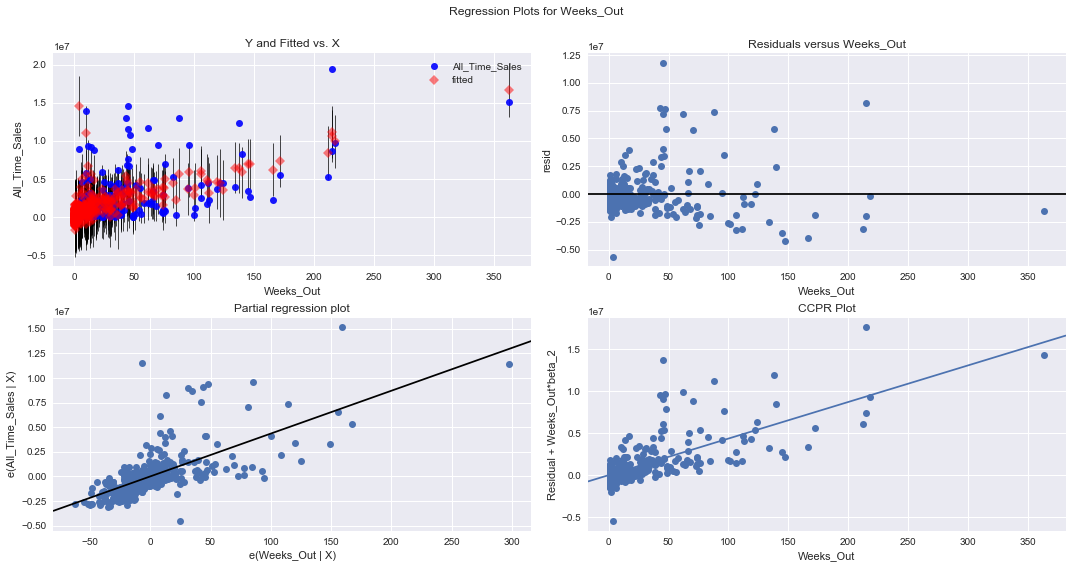

In [19]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(lr_model, "Weeks_Out", fig=fig)
plt.show()

/Users/hiowatah/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


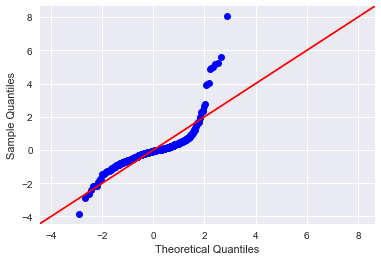

In [14]:
import scipy.stats as stats
residuals = lr_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Text(0.5, 1.0, 'Linearity Check')

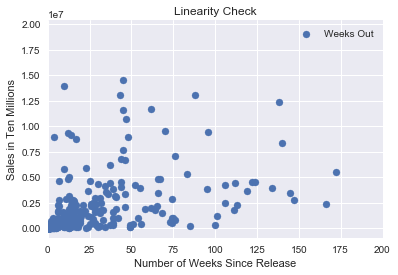

In [15]:
plt.scatter(df.Weeks_Out,df.All_Time_Sales, label = 'Weeks Out');
plt.legend();
plt.xlabel('Number of Weeks Since Release')
plt.ylabel('Sales in Ten Millions')
plt.xlim(0, 200)
plt.title('Linearity Check')